In [1]:
# importing the required modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from matplotlib import figure
import warnings

warnings.simplefilter("ignore")

In [2]:
# importing the dataset

df = pd.read_csv("sales_data.txt")
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [3]:
df.shape

(113036, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [5]:
# mean age of the customer

df["Customer_Age"].mean()

35.91921157861212

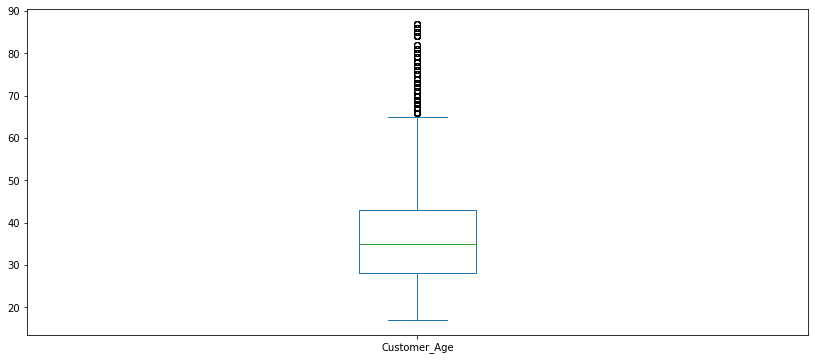

In [6]:
df["Customer_Age"].plot(kind= "box", figsize= (14, 6))

In [7]:
(df["Customer_Age"] > 70).value_counts()

False    112782
True        254
Name: Customer_Age, dtype: int64

In [8]:
# mean of order_quantity

df["Order_Quantity"].mean()

11.901659648253654

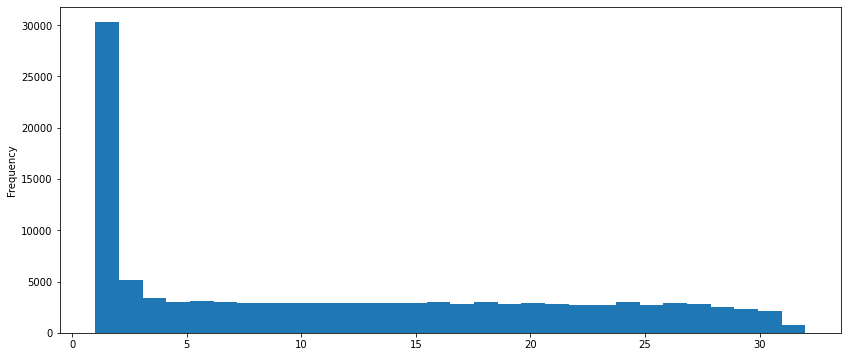

In [9]:
df["Order_Quantity"].plot(kind= "hist", figsize= (14, 6), bins= 30)

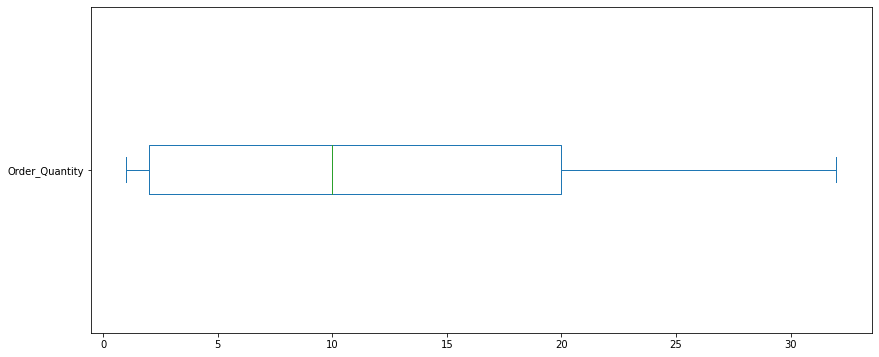

In [10]:
df["Order_Quantity"].plot(kind= "box", figsize= (14, 6), vert= False)

In [11]:
# how many sales per year

df["Year"].value_counts()

2014    29398
2016    29398
2013    24443
2015    24443
2012     2677
2011     2677
Name: Year, dtype: int64

Text(0.5, 1.0, 'Sales per year')

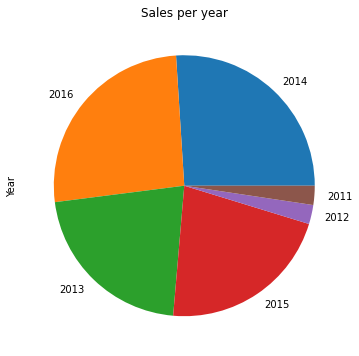

In [12]:
df["Year"].value_counts().plot(kind= "pie", figsize= (6, 6))
plt.title("Sales per year")

In [13]:
# sales per month

df["Month"].value_counts()

June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: Month, dtype: int64

Text(0, 0.5, 'Sales')

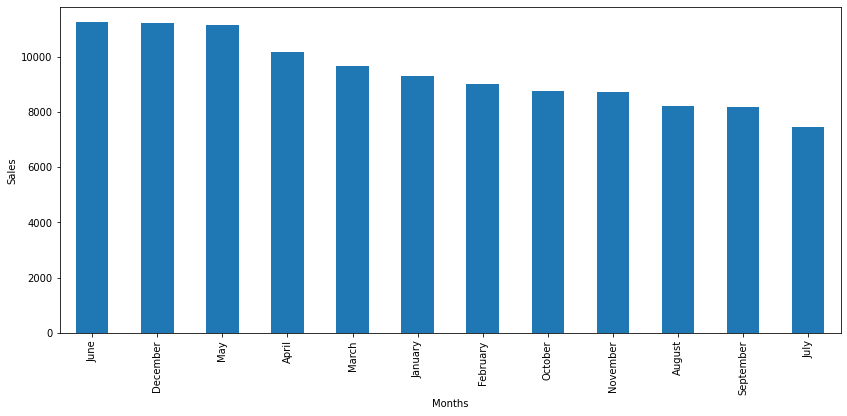

In [14]:
df["Month"].value_counts().plot(kind= "bar", figsize= (14, 6))
plt.xlabel("Months")
plt.ylabel("Sales")

In [15]:
# Countries having the highest sales

df["Country"].value_counts().nlargest(5)

United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
Name: Country, dtype: int64

Text(0, 0.5, 'Number of sales')

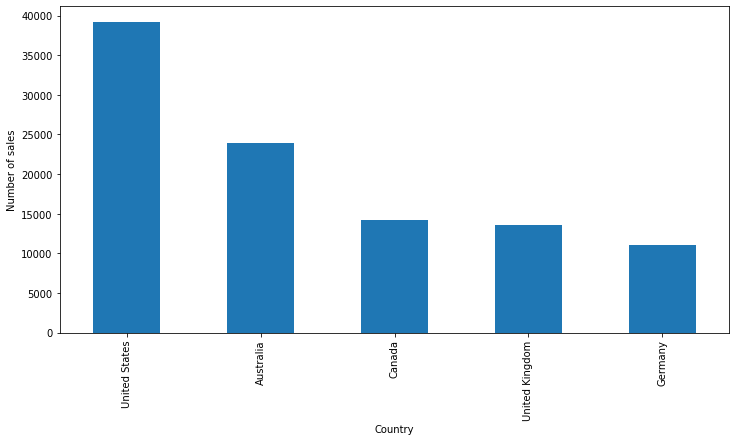

In [16]:
df["Country"].value_counts().nlargest(5).plot(kind= "bar", figsize= (12, 6))
plt.xlabel("Country")
plt.ylabel("Number of sales")

In [17]:
# top 10 products sold

df["Product"].value_counts().nlargest(10)

Water Bottle - 30 oz.      10794
Patch Kit/8 Patches        10416
Mountain Tire Tube          6816
AWC Logo Cap                4358
Sport-100 Helmet, Red       4220
Road Tire Tube              4176
Sport-100 Helmet, Black     4152
Fender Set - Mountain       4032
Sport-100 Helmet, Blue      3788
Touring Tire Tube           3702
Name: Product, dtype: int64

Text(0, 0.5, 'Number of Products sold')

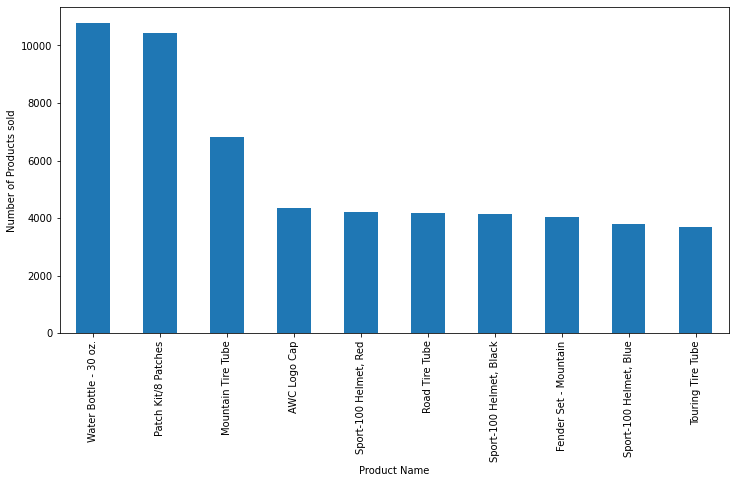

In [18]:
df["Product"].value_counts().nlargest(10).plot(kind= "bar", figsize= (12, 6))
plt.xlabel("Product Name")
plt.ylabel("Number of Products sold")

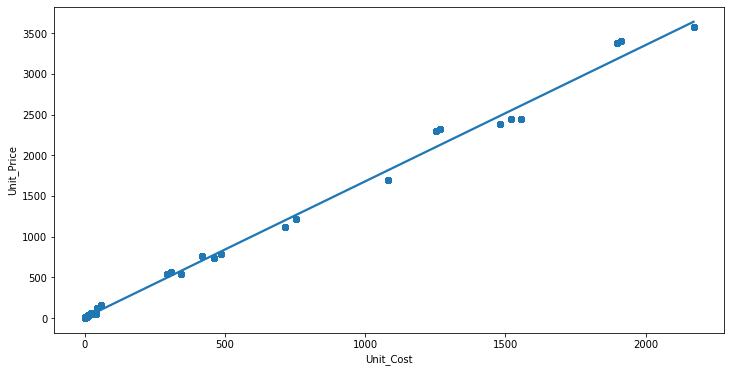

In [19]:
# relation between unit_cost and unit_price

plt.figure(figsize= (12, 6))
sns.regplot(x= df["Unit_Cost"], y= df["Unit_Price"])

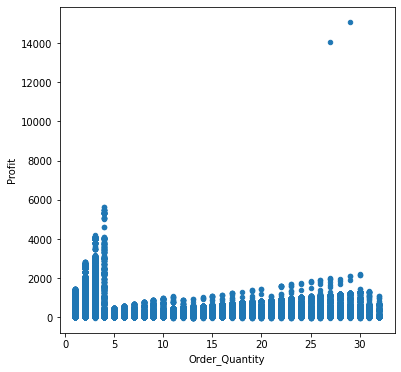

In [20]:
# relation between Order_Quantity and Profit

df.plot(kind='scatter', x='Order_Quantity', y='Profit', figsize=(6,6))

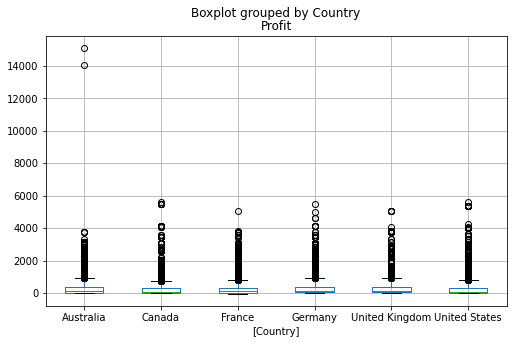

In [21]:
# profit per country

df[["Profit", "Country"]].boxplot(by= "Country", figsize= (8, 5))

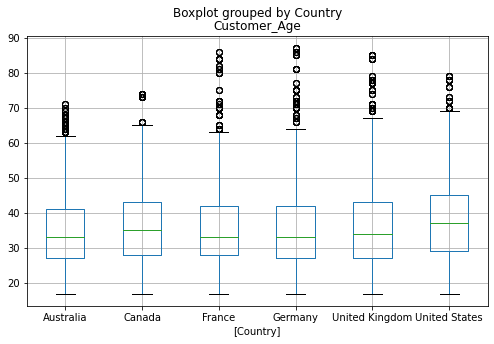

In [22]:
# relation between Customer_Age and Country

df[["Customer_Age", "Country"]].boxplot(by= "Country", figsize= (8, 5))

In [23]:
# adding a new column of date

df["Calculated_Date"] = df[["Year", "Month", "Day"]].apply(lambda x: "{}-{}-{}".format(x[0], x[1], x[2]), axis= 1)
df["Calculated_Date"].head()

0    2013-November-26
1    2015-November-26
2       2014-March-23
3       2016-March-23
4         2014-May-15
Name: Calculated_Date, dtype: object

In [24]:
df["Calculated_Date"] = pd.to_datetime(df["Calculated_Date"])
df["Calculated_Date"].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_Date, dtype: datetime64[ns]

Text(0, 0.5, 'Number of Sales')

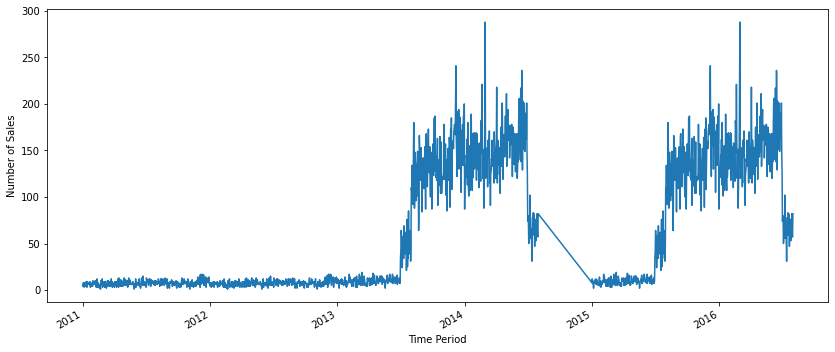

In [25]:
df["Calculated_Date"].value_counts().plot(kind= "line", figsize= (14, 6))
plt.xlabel("Time Period")
plt.ylabel("Number of Sales")

In [26]:
# sales made in Canada and France

df.loc[(df["Country"] == "Canada") | (df["Country"] == "France")].shape[0]

25176

In [27]:
# Bike Racks made in Canada

df.loc[(df["Sub_Category"] == "Bike Racks") & (df["Country"] == "Canada")].shape[0]

104

In [28]:
# orders made in each region of the France

orders = df.loc[df["Country"] == "France", "State"].value_counts()
orders

Seine (Paris)        2328
Seine Saint Denis    1684
Nord                 1670
Hauts de Seine       1084
Essonne               994
Yveline               954
Seine et Marne        394
Moselle               386
Loiret                382
Val d'Oise            264
Garonne (Haute)       208
Val de Marne          158
Charente-Maritime     148
Somme                 134
Loir et Cher          120
Pas de Calais          90
Name: State, dtype: int64

Text(0, 0.5, 'Number of Sales')

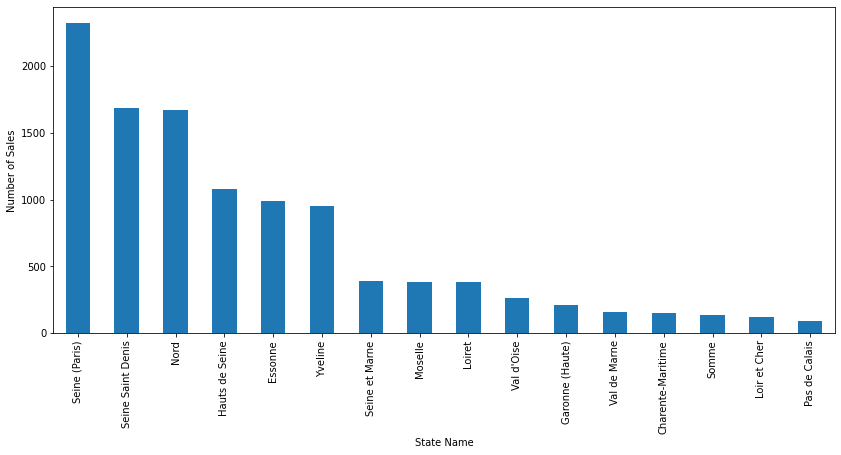

In [29]:
orders.plot(kind= "bar", figsize= (14, 6))
plt.xlabel("State Name")
plt.ylabel("Number of Sales")

In [30]:
# sales of each categories

categories = df["Product_Category"].value_counts()
categories

Accessories    70120
Bikes          25982
Clothing       16934
Name: Product_Category, dtype: int64

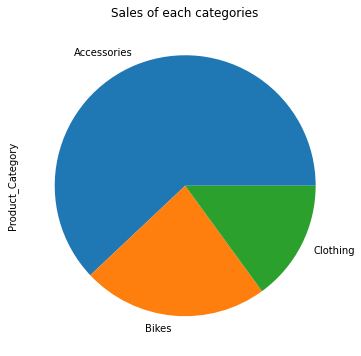

In [31]:
categories.plot(kind= "pie", figsize= (6, 6))
plt.title("Sales of each categories");

In [32]:
# orders made per accessory sub-categories

accessories = df.loc[ df["Product_Category"] == "Accessories", "Sub_Category"].value_counts()
accessories

Tires and Tubes      33870
Bottles and Cages    15876
Helmets              12158
Fenders               4032
Cleaners              1802
Hydration Packs       1334
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

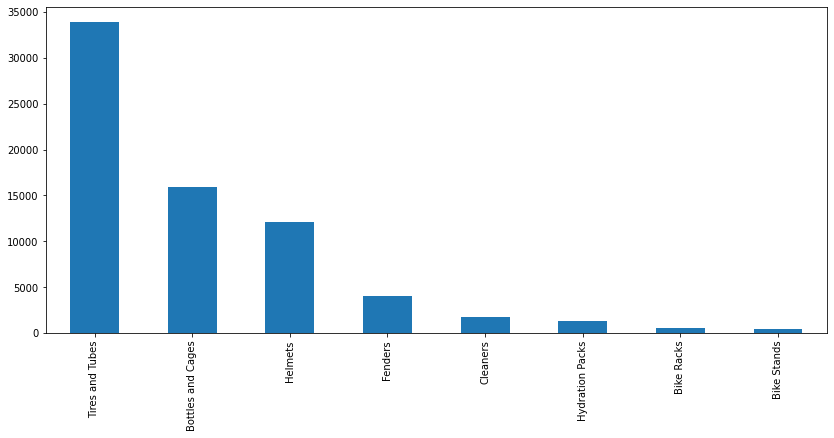

In [33]:
accessories.plot(kind= "bar", figsize= (14, 6))

In [34]:
# orders made per bikes sub-categories

bikes = df.loc[ df["Product_Category"] == "Bikes", "Sub_Category"].value_counts()
bikes

Road Bikes        13430
Mountain Bikes     8854
Touring Bikes      3698
Name: Sub_Category, dtype: int64

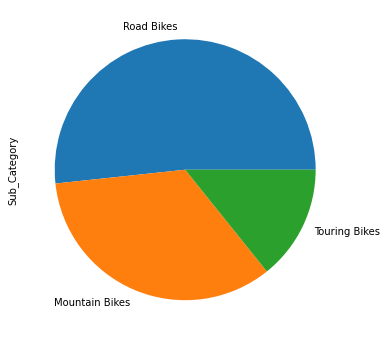

In [35]:
bikes.plot(kind= "pie", figsize= (6, 6))

In [36]:
# which gender has the highest sales

gender = df["Customer_Gender"].value_counts()
gender

M    58312
F    54724
Name: Customer_Gender, dtype: int64

Text(0, 0.5, 'Number of sales')

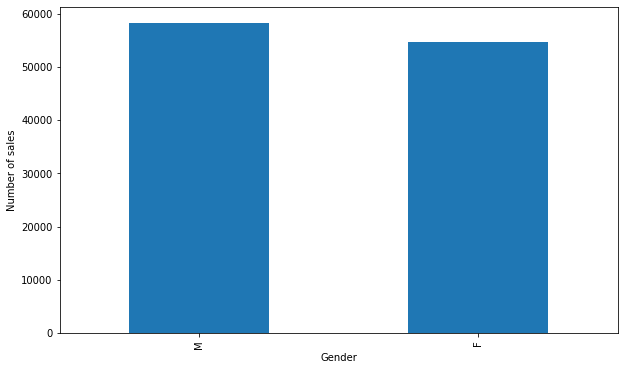

In [37]:
gender.plot(kind= "bar", figsize= (10, 6))
plt.xlabel("Gender")
plt.ylabel("Number of sales")

In [38]:
# revenue more than 500 made by men

df.loc[(df["Customer_Gender"] == "M") & (df["Revenue"] > 500)].shape[0]

21773

In [39]:
# top 5 sales with the highest revenue

df.sort_values(["Revenue"], ascending= False).head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58074,2015-07-24
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54069,2013-07-24
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5628,8684,14312,2011-07-08
70307,2011-04-30,30,April,2011,44,Adults (35-64),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14169,2011-04-30
70601,2011-09-30,30,September,2011,19,Youth (<25),F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14169,2011-09-30


In [40]:
# mean of order quantity with more than 10k in revenue

cond = df["Revenue"] > 10000
df.loc[cond, "Order_Quantity"].mean()

3.7218934911242605

In [41]:
# mean of order quantity with less than 10k in revenue

cond = df["Revenue"] < 10000
df.loc[cond, "Order_Quantity"].mean()

11.913907519469818

In [42]:
# orders made in the May of 2016

df.loc[(df["Year"] == 2016) & (df["Month"] == "May")].shape[0]

5015

In [43]:
# orders made between May and July of 2016

df.loc[(df["Year"] == 2016) & (df["Month"].isin(["May", "June", "July"]))].shape[0]

12164